<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

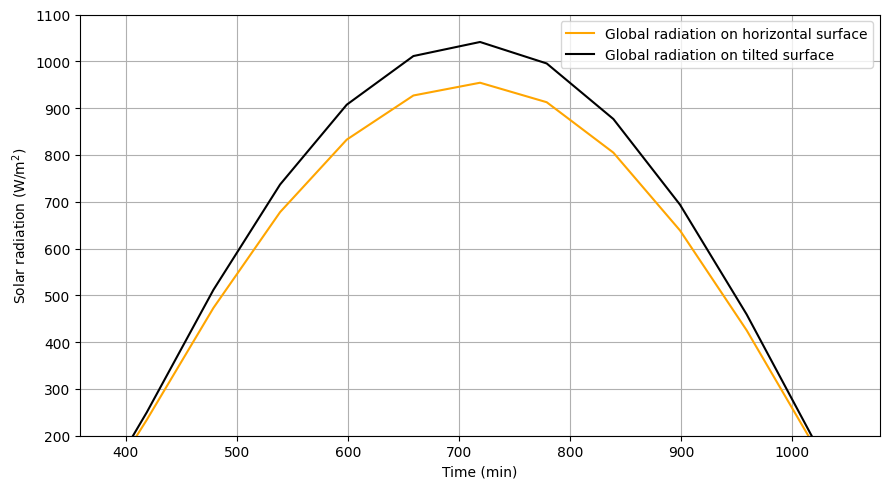

In [6]:
#Example 1.6

import numpy as np
import matplotlib.pyplot as plt

L = 29.36  # Latitude
LOD = 47.97  # Longitude
N = 90  # Day number (31/03/2015)
T_GMT = +3  # Time difference from GMT
Step = 60  # Time step in minutes

# Declination angle
Ds = 23.45 * np.sin(np.radians((360 * (N - 81)) / 365))

# Equation of time
B = (360 * (N - 81)) / 364
EoT = (9.87 * np.sin(np.radians(2 * B))) - \
      (7.53 * np.cos(np.radians(B))) - \
      (1.5 * np.sin(np.radians(B)))

# Local Meridian Standard Time
Lzt = 15 * T_GMT
Ts_correction = (-4 * (Lzt - LOD)) + EoT if LOD >= 0 else (4 * (Lzt - LOD)) + EoT

# Sunrise/Sunset calculation
Wsr_ssi = -np.tan(np.radians(Ds)) * np.tan(np.radians(L))
Wsrsr_ss = np.degrees(np.arccos(Wsr_ssi))

ASTsr = abs(((Wsrsr_ss / 15) - 12) * 60)
ASTss = ((Wsrsr_ss / 15) + 12) * 60
Tsr = ASTsr + abs(Ts_correction)
Tss = ASTss + abs(Ts_correction)

# Solar elevation angle (sin_Alpha) calculation
LMT = np.arange(Tsr, Tss, Step)
sin_Alpha = []
for t in LMT:
    Ts = t + Ts_correction
    Hs = (15 * (Ts - 12 * 60)) / 60
    sin_Alpha_i = (np.sin(np.radians(L)) * np.sin(np.radians(Ds)) +
                   np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.cos(np.radians(Hs)))
    sin_Alpha.append(sin_Alpha_i)

sin_Alpha = np.array(sin_Alpha)

# Solar radiation calculations
A = 1160 + (75 * np.sin(np.radians((360 / 365) * (N - 275))))
k = 0.174 + (0.035 * np.sin(np.radians((360 / 365) * (N - 100))))
C = 0.095 + (0.04 * np.sin(np.radians((360 / 365) * (N - 100))))

G_B_norm = A * np.exp(-k / sin_Alpha)
G_B = G_B_norm * sin_Alpha
G_D = C * G_B_norm
G_T = G_B + G_D

# Radiation on tilted surface
Beta = L  # Tilt angle
Rb = ((np.cos(np.radians(L - Beta)) * np.cos(np.radians(Ds)) * np.sin(np.radians(Wsrsr_ss))) +
      (np.radians(Wsrsr_ss)) * np.sin(np.radians(L - Beta)) * np.sin(np.radians(Ds))) / \
     ((np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.sin(np.radians(Wsrsr_ss))) +
      (np.radians(Wsrsr_ss)) * np.sin(np.radians(L)) * np.sin(np.radians(Ds)))

Rd = (1 + np.cos(np.radians(Beta))) / 2
Rr = (0.3 * (1 - np.cos(np.radians(Beta)))) / 2

G_B_Beta = G_B * Rb
G_D_Beta = G_D * Rd
G_R = G_T * Rr
G_T_Beta = G_B_Beta + G_D_Beta + G_R

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(LMT, G_T, color='orange', label='Global radiation on horizontal surface')
plt.plot(LMT, G_T_Beta, 'k', label='Global radiation on tilted surface')
plt.xlabel('Time (min)')
plt.ylabel(r'Solar radiation (W/m$^2$)')
plt.xlim(min(LMT), max(LMT))
plt.ylim(200, 1100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

